In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# caminho do arquivo 
df = pd.read_csv(r'C:\Users\Cliente\Desktop\Python\house-price-prediction\data\raw\train.csv')

# Remove colunas com muitos valores nulos ou irrelevantes
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

# Remove colunas com menos de 70% de preenchimento
limite_nulos = len(df) * 0.3
df = df.loc[:, df.isnull().sum() < limite_nulos]

# Preenche valores numéricos nulos com a mediana
df.fillna(df.median(numeric_only=True), inplace=True)

# Preenche valores categóricos nulos com a moda
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Transforma variáveis categóricas em variáveis numéricas (one-hot)
df_encoded = pd.get_dummies(df, drop_first=True)

# Define variável alvo e variáveis preditoras
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faz previsões e calcula o erro
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')




RMSE: 29061.62


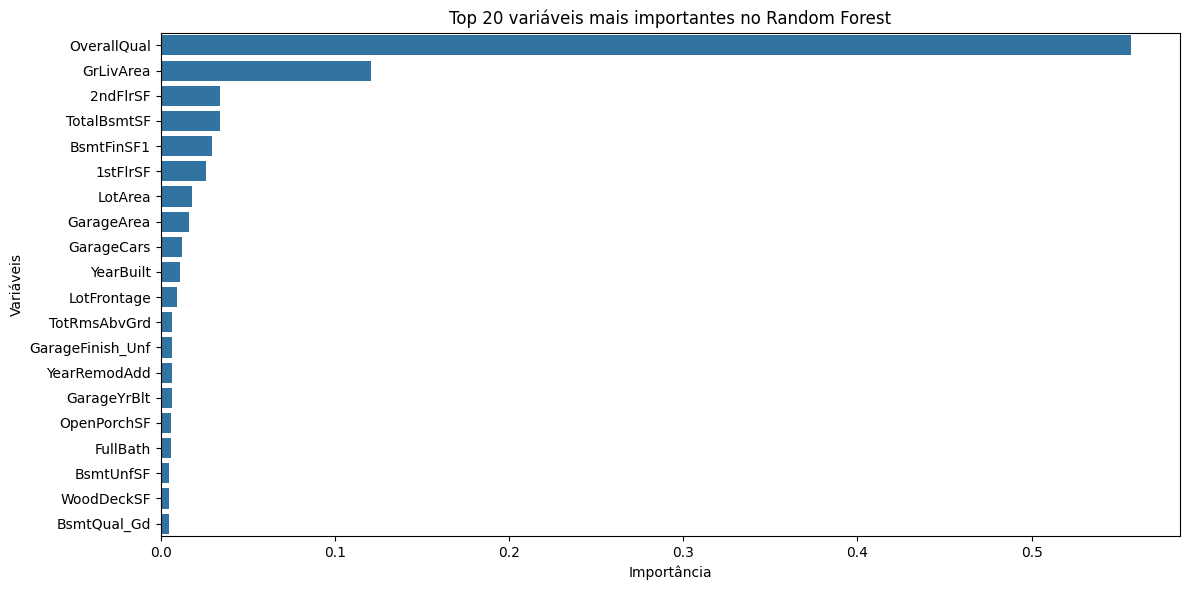

In [6]:
importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Top 20 variáveis mais importantes no Random Forest")
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

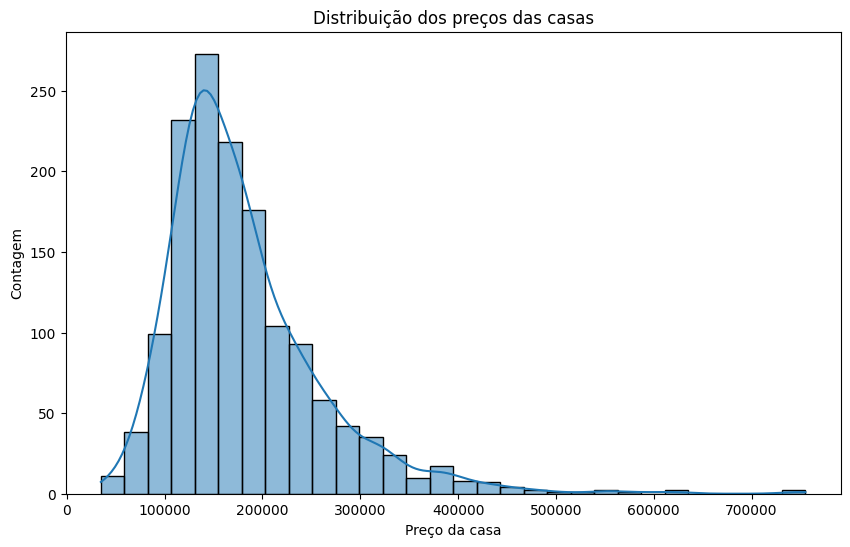

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribuição dos preços das casas')
plt.xlabel('Preço da casa')
plt.ylabel('Contagem')
plt.show()

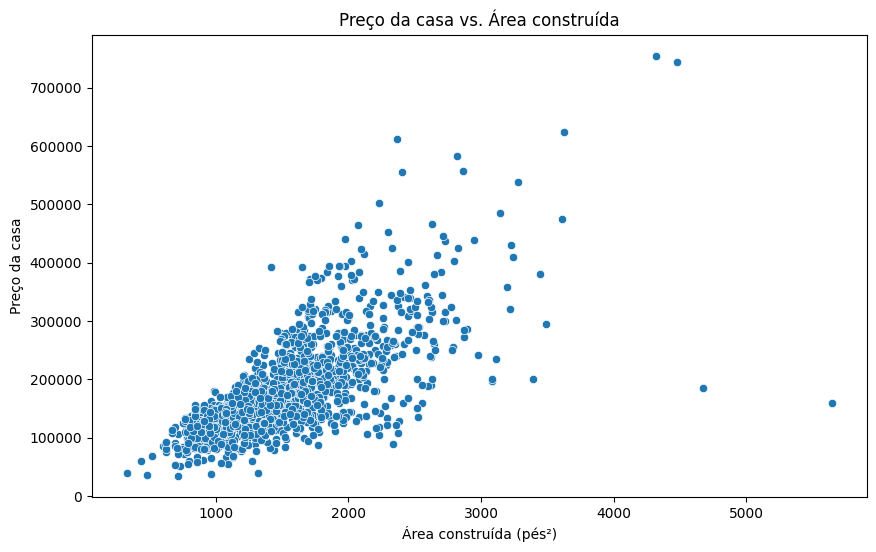

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Preço da casa vs. Área construída')
plt.xlabel('Área construída (pés²)')
plt.ylabel('Preço da casa')
plt.show()

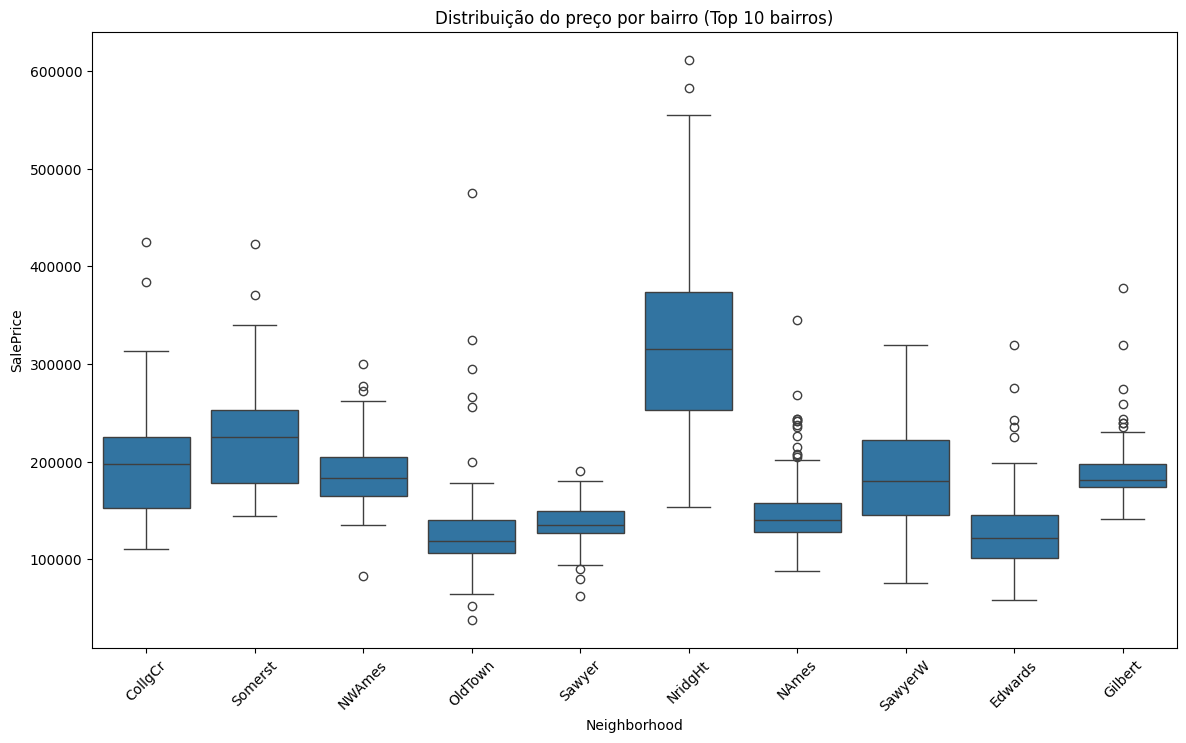

In [9]:
plt.figure(figsize=(14,8))
top_neighborhoods = df['Neighborhood'].value_counts().index[:10]  # Top 10 bairros mais comuns
sns.boxplot(data=df[df['Neighborhood'].isin(top_neighborhoods)], x='Neighborhood', y='SalePrice')
plt.title('Distribuição do preço por bairro (Top 10 bairros)')
plt.xticks(rotation=45)
plt.show()

Top 3 variáveis importantes:
4: OverallQual
16: GrLivArea
14: 2ndFlrSF


c:\Users\Cliente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column np.int64(4) contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
c:\Users\Cliente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column np.int64(16) contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
c:\User

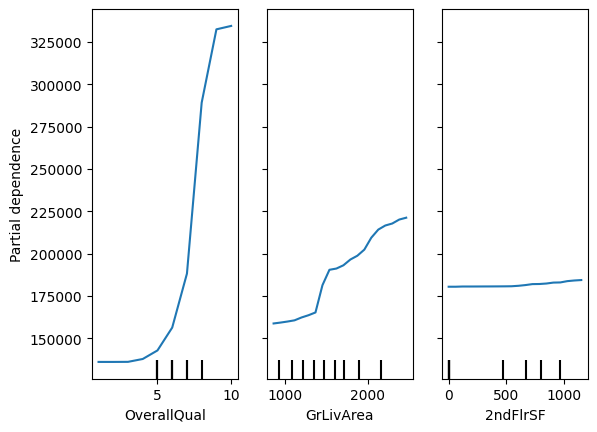

In [14]:
# Partial Dependence Plots (PDP)
from sklearn.inspection import PartialDependenceDisplay
import numpy as np

# Identificar os índices das 3 variáveis mais importantes
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 3 variáveis importantes:")
for i in indices[:3]:
    print(f"{i}: {X.columns[i]}")

features_to_plot = indices[:3]  # usa as 3 mais importantes

PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, feature_names=X.columns, grid_resolution=20
)
plt.show()

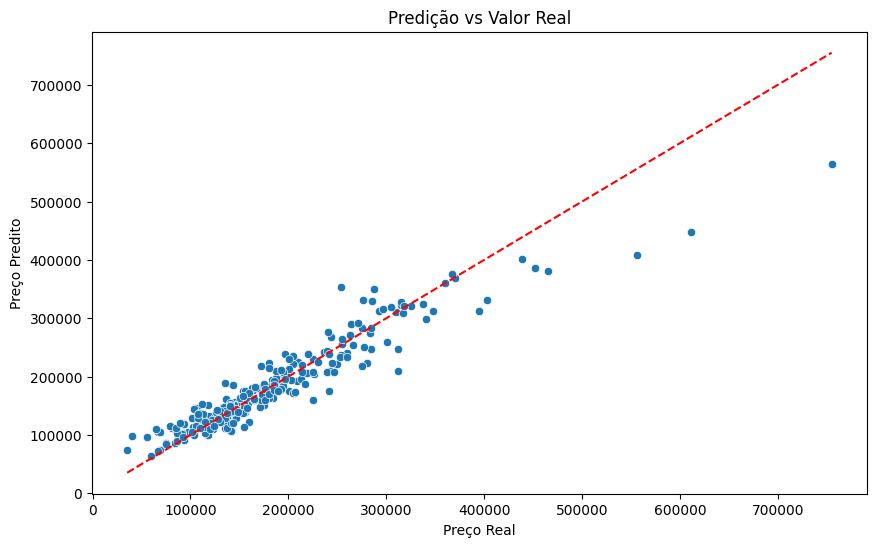

In [15]:
# Predição vs valor real
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha y=x
plt.xlabel('Preço Real')
plt.ylabel('Preço Predito')
plt.title('Predição vs Valor Real')
plt.show()

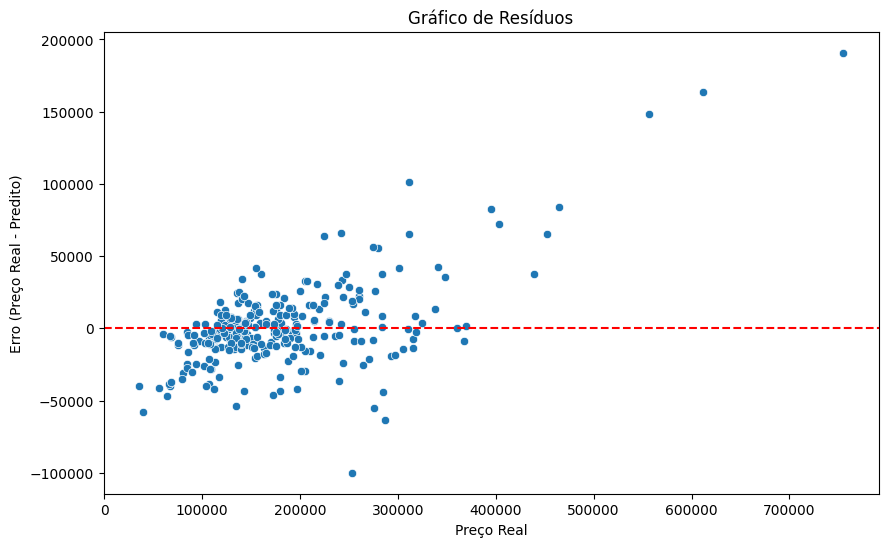

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resíduos: diferença entre preço real e previsto
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Preço Real')
plt.ylabel('Erro (Preço Real - Predito)')
plt.title('Gráfico de Resíduos')
plt.show()